<a href="https://colab.research.google.com/github/tirals88/Deep-Learning/blob/main/1%EA%B6%8C_3%EC%9E%A5_%EC%8B%A0%EA%B2%BD%EB%A7%9D(%EC%86%8C%ED%94%84%ED%8A%B8%EB%A7%A5%EC%8A%A4_%EB%B6%80%ED%84%B0)_%2B_4%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 소프트맥스 구현하기


---
신경망은 분류와 회귀 모두에서 이용할 수 있다.

다만 둘 중 어떤 문제냐에 따라 출력층에서 사용하는 **활성화 함수**가 달라진다.

일반적으로 회귀에는 **항등 함수 (σ)**를, 분류에는 **소프트맥스**함수를 사용한다.

In [ ]:
#항등 함수 σ

def identify_function(x):
  return x

**소프트맥스 함수 softmax function**

$$ y_k = \frac{\exp(a_k)}{\displaystyle\sum_{i=1}^{n} \exp(a_i)} $$

$n$은 출력층의 뉴런 수, $y_k$는 그 중 $k$번째 출력

이렇게 되면 소프트맥스의 출력은 하나의 입력값만을 고려한 것이 아닌 **모든 입력신호로 부터 영향**을 받게 됨. (분모에서 출력층의 각 뉴런이 모든 입력 신호에서 영향을 받게 된다)

In [ ]:
# 소프트맥스 함수 구현

a = np.array([.3, 2.9, 4.])

exp_a = np.exp(a)

sum_exp_a = np.sum(np.exp(a))
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [ ]:
def sofmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)

  y = exp_a / sum_exp_a
  
  return y

# **소프트 맥스 함수 구현 시 주의점**

---



$#.1$ **오버플로우 문제**

지수 함수는 큰 값을 내기 쉽다. $e^{10}$은 20,000이 넘고, $e^{100}$은 0이 40개가 넘어가 $e^{1000}$은 무한대 $inf$가 되어 돌아옴.

위 문제를 해결하도록 개선

$${y_k = \frac{\exp(a_k)}{\displaystyle\sum_{i=1}^{n}\exp(a_i)}= \frac{C\exp(a_k)}{\displaystyle\sum_{i=1}^{n}C\exp(a_i)}}$$
<br/>$${=\frac{\exp(a_k + \log{C})}{\displaystyle\sum_{i=1}^{n}\exp(a_i + \log{C})}}=\frac{\exp(a_k + C^{'})}{\displaystyle\sum_{i=1}^{n}\exp(a_i + C^{'})}$$
<br/><br/>$$C = \exp(\log{C}) = \exp(C^{'})$$

**어떠한 정수를 더하거나 뺴도 결과는 바뀌지 않기에** 오버플로우를 막는 목적으로

**입력 신호 중 최댓값을 이용**하는 것이 일반적이다.

In [ ]:
a = np.array([1010, 1000, 990])
print(np.exp(a) / np.sum(np.exp(a)))

c = np.max(a)
A = a - c
print(A)
print(np.exp(A) / np.sum(np.exp(A)))

[nan nan nan]
[  0 -10 -20]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


위와 같이 아무런 조치 없이 계산하면 **nan** (not a number)이 출력 됨

In [ ]:
def softmax(a):
  max = np.max(a)
  exp_a = np.exp(a-max)
  y = (exp_a) / np.sum(exp_a)
  return y

print(softmax(a))

[9.99954600e-01 4.53978686e-05 2.06106005e-09]


# 소프트맥스 함수의 특징

---



In [ ]:
K = np.array([.3, 2.9, 4.])
y = softmax(K)
print(y)

print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


위와 같이 소프트맥스 함수의 출력은 항상 0 ~ 1.0 사이의 실수이며 총합은 1이 된다.

이를 이용해 소프트맥스 함수의 출력을 **'확률'**로 해석할 수 있다.

위의 값을 확률로 보자면 1.8% / 24.5% / 73.7%가 된다.<br/>이 결과 y[2]의 확률이 가장 높으니 답은 2번쨰 클래스다 라고 할 수 있다.<br/>즉 소프트맥스 함수를 이용함으로써 문제를 확률적/통계적으로 대응할 수 있게 되었다.

$#.1$ 소프트맥스 함수를 적용해도 각 원소의 대소 관계는 변하지 않는다.<br/>신경망을 이용한 분류에서는 일반적으로 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식한다.<br/>그리고 소프트맥스 함수를 적용해도 출력이 가장 큰 뉴런의 위치는 달라지지 않는다.<br/><br/>결과적으로 신경망으로 분류할 때 소프트맥스 함수를 생략해도 되어 일반적으로 생략된다.

$#.2$ 출력층의 뉴런 수 정하기

분류에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적이다.

# 손글씨 숫자 인식

---
이미 학습된 매개변수를 사용하여 학습 과정은 색략. 추론 과정만 구현 /// 이 추론 과정을 신경망의 **순전파(forward propagation)**라고도 한다.

In [ ]:
#1. MNIST 데이터셋 (훈련 이미지가 60,000장, 시험 이미지가 10,000장)
#이미지 데이터는 28X28 회색조 이미지(1채널)이며, 각 픽셀은 0-255까지의 값


In [ ]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

ModuleNotFoundError: ignored

In [14]:
#Google Drive에 mnist파일을 직접 clone먼저 하기
#드라이브연동
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
cd '/content/drive/My Drive/DLscratch'

/content/drive/My Drive/DLscratch


In [16]:
!git clone https://github.com/WegraLee/deep-learning-from-scratch.git

fatal: destination path 'deep-learning-from-scratch' already exists and is not an empty directory.


In [17]:
cd '/content/drive/My Drive/DLscratch/deep-learning-from-scratch/ch03'

/content/drive/My Drive/DLscratch/deep-learning-from-scratch/ch03


In [18]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

mnist.py 파일이 deep-learning-from-scratch/dataset/ 에 위치하도록 설정 후, 이 파일은 deep-learning-from-scartch/ch03/에 위치

이후 부모디렉터리의 파일을 가져올 수 있도록 설정 하고 load_mnist 함수를 임포트



In [19]:
(x_train, t_train), (x_test, t_test) = \
  load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


load_mnist 함수는 읽은 MNIST 데이터를 "(훈련 이미지, 훈련 레이블), (시험 이미지, 시험레이블)" 형식으로 반환한다.

인수로는 normalize, flatten, one_hot_label 세 가지를 설정할 수 있다.

세 인수 모두 bool 값이며 첫 번째 인수 **normalize**는 입력 이미지의 픽셀값을 0.0 ~ 1.0 사이의 값으로 정규화할지를 정한다. False로 설정하면 입력 이미지의 픽셀값은 원래 값 그대로 0 ~ 255 사이의 값을 유지한다.

두 번째 인수인 flatten은 입력 이미지를 평탄하게, 즉 1차원 배열로 만들지를 정한다. False로 설정하면 입력 이미지를 1 \* 28 \* 28 의 3차원 배열로, True로 설정하면 784개의 원소로 이뤄진 1차원 배열로 저장합니다.

세 번째 인수인 one_hot_label은 레이블을 **원-핫 인코딩** 형태로 저장할지를 정한다. 원-핫 인코딩이란, 예를 들어 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0,] 처럼 정답을 뜻하는 원소만 1이고 ( hot하고 ) 나머지는 모두 0인 배열이다. one_hot_label이 False면 '7'이나 '2'와 같이 숫자 형태의 레이블을 저장하고, True 일 때는 레이블을  원-핫 인코딩하여 저장한다.

5
(784,)
(28, 28)


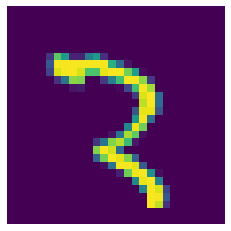

In [39]:
%matplotlib inline
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image
from matplotlib import pyplot as plt

def img_show(img):
  plt.axis(False)
  plt.imshow(img)

(x_train, t_train), (x_test, t_test) = \
  load_mnist(flatten = True, normalize = False)

img = x_train[500]
label = t_train[0]

print(label) # 5

print(img.shape)            # (784, ) flatten = True 
img = img.reshape(28, 28)   # 원래 이미지의 모양으로 변형
print(img.shape)            # (28, 28) flatten = False

img_show(img)

# 신경망의 추론 처리


---
MNIST 데이터셋을 가지고 추론을 수행하는 신경망을 구현

입력층 뉴런을 784개, 출력층 뉴런을 10개로 구성. 입력층 뉴런이 784개인 이유는 이미지 크기가 28\*28 = 784이기 떄문이고, 출력층 뉴런이 10개인 이유는 이 문제가 0에서 9까지의 숫자를 구분하는 문제이기 때문이다.

은닉층은 총 두 개로 첫 번쨰 은닉층에는 50개의 뉴런을, 두 번째 은닉층에는 100개의 뉴런을 배치.여기서 50과 100은 임의로 정한 값.

먼저 작업 처리를 위한 세 함수를 정의

In [40]:
#1. get_data()
def get_data():
  (x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize = True, flatten = True, one_hot_label = False)
  return x_test, t_test

#2. init_network()
def init_network():
  with open("sample_weight.pkl", 'rb') as f:
    network = pickle.load(f)
  
  return network

#3. predict(network, x)
def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2']. network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1= np.dot(x, W1) + b1